<a href="https://colab.research.google.com/github/doctorpeppercokebear/computer_vision/blob/main/googlenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [ ]:
print(x_train.shape)
print(y_train[:10])
x_train = x_train / 255.
x_test = x_test / 255.

(50000, 32, 32, 3)
[[19]
 [29]
 [ 0]
 [11]
 [ 1]
 [86]
 [90]
 [28]
 [23]
 [31]]


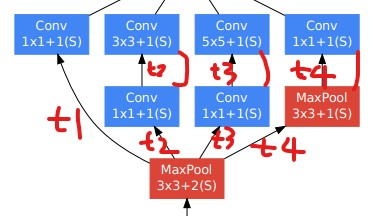

In [ ]:
input_layer = layers.Input(shape = (32,32,3), name='start layer')

tower_1 = layers.Conv2D(64, kernel_size = (1,1) , padding='same' , activation= 'relu')(input_layer)

tower_2 = layers.Conv2D(64, kernel_size = (1,1) , padding='same' , activation= 'relu')(input_layer)
tower_2 = layers.Conv2D(64, kernel_size = (3,3) , padding='same' , activation= 'relu')(tower_2)

tower_3 = layers.Conv2D(64, kernel_size = (1,1) , padding='same' , activation= 'relu')(input_layer)
tower_3 = layers.Conv2D(64, kernel_size = (5,5) , padding='same' , activation= 'relu')(tower_3)

tower_4 = layers.MaxPool2D(pool_size=(3,3), strides=(1,1) , padding='same')(input_layer)
tower_4 = layers.Conv2D(64, kernel_size=(1,1) , padding='same' , activation='relu')(tower_4)

concat_layer = layers.concatenate([tower_1, tower_2,tower_3,tower_4], axis=3)

tower_2_1 = layers.Conv2D(120, kernel_size = (1,1) , padding='same' , activation= 'relu')(concat_layer)

tower_2_2 = layers.Conv2D(120, kernel_size = (1,1) , padding='same' , activation= 'relu')(concat_layer)
tower_2_2 = layers.Conv2D(120, kernel_size = (3,3) , padding='same' , activation= 'relu')(tower_2_2)

tower_2_3 = layers.Conv2D(120, kernel_size = (1,1) , padding='same' , activation= 'relu')(concat_layer)
tower_2_3 = layers.Conv2D(120, kernel_size = (5,5) , padding='same' , activation= 'relu')(tower_2_3)

tower_2_4 = layers.MaxPool2D(pool_size=(3,3), strides=(1,1) , padding='same')(concat_layer)
tower_2_4 = layers.Conv2D(120, kernel_size=(1,1) , padding='same' , activation='relu')(tower_2_4)

final_concat_layer = layers.concatenate([tower_2_1, tower_2_2,tower_2_3,tower_2_4], axis=3)
average_pooling_layer = layers.AveragePooling2D(pool_size=(16,16),strides=(16,16))(final_concat_layer)
flat_layer = layers.Flatten()(average_pooling_layer)
output_layer = layers.Dense(100 , activation = 'softmax')(flat_layer)

google_net_model = models.Model(inputs = input_layer, outputs = output_layer)
google_net_model.summary()



Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 start layer (InputLayer)    [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_37 (Conv2D)          (None, 32, 32, 64)           256       ['start layer[0][0]']         
                                                                                                  
 conv2d_39 (Conv2D)          (None, 32, 32, 64)           256       ['start layer[0][0]']         
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 3)            0         ['start layer[0][0]']         
 g2D)                                                                                       

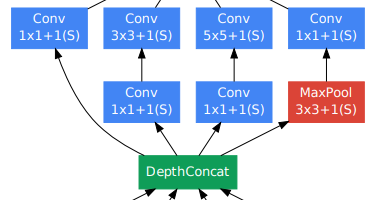

In [ ]:
google_net_model.compile(loss='sparse_categorical_crossentropy',
                         optimizer='adam', metrics=['accuracy'])

In [ ]:
google_net_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 66s 38ms/step - loss: 3.8996 - accuracy: 0.1063 - val_loss: 3.5835 - val_accuracy: 0.1618
Epoch 2/10
1563/1563 [==============================] - 57s 36ms/step - loss: 3.3431 - accuracy: 0.2066 - val_loss: 3.1815 - val_accuracy: 0.2431
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 2.9397 - accuracy: 0.2821 - val_loss: 2.8656 - val_accuracy: 0.3021
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 2.6884 - accuracy: 0.3314 - val_loss: 2.6890 - val_accuracy: 0.3405
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 2.4981 - accuracy: 0.3692 - val_loss: 2.5764 - val_accuracy: 0.3623
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 2.3388 - accuracy: 0.4050 - val_loss: 2.4725 - val_accuracy: 0.3901
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 2.2078 - accuracy: 0.4324 - val_loss: 2.4116 -